In [3]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
from tabulate import tabulate
from IPython.display import display

df = pd.read_csv('synthetic_stock_data.csv')

# Set option to display all columns
pd.set_option('display.max_columns', None)

# Assuming your DataFrame is already loaded in 'df'
# Apply CSS styling to align columns to the center
styled_df = df.style.set_properties(**{'text-align': 'center'})

# Display the styled DataFrame with all columns visible
display(styled_df)


In [ ]:
data = pd.read_csv('synthetic_stock_data.csv')

# Set desired sample size
n = 150  # Adjust as needed

# Sample without replacement
sample = data.sample(n=n, replace=False, random_state=42)

# Convert 'Date' to datetime format (in case it's not already)
sample['Date'] = pd.to_datetime(sample['Date'])

# Sort by Date (chronological order)
sample_sorted = sample.sort_values(by='Date').reset_index(drop=True)

# Add Serial Number column starting from 1
sample_sorted.insert(0, 'S.No', range(1, n + 1))

# Display formatted output
print("\nChronologically Sorted Sample with Serial Numbers:\n")
print(tabulate(sample_sorted, headers='keys', tablefmt='plain', showindex=False))

# Optional: Save the result to a CSV
sample_sorted.to_csv('chronological_sample.csv', index=False)



Chronologically Sorted Sample with Serial Numbers:

  S.No  Date                 Company            Sector              Open      High       Low     Close    Volume    Market_Cap    PE_Ratio    Dividend_Yield    Volatility    Sentiment_Score  Trend
     1  2022-01-11 00:00:00  Tesla              Finance          99.7687  102.732    98.532    99.7687    176324   4.27362e+11    16.0923          4.51118       0.030492         -0.0445157   Bullish
     2  2022-01-24 00:00:00  Ferrari            Aerospace       100.94    102.577    99.519   100.94      172537   4.97515e+11    14.4266          2.81662       0.0277646         0.342812    Stable
     3  2022-01-26 00:00:00  PayPal             Healthcare      100.883   103.286    99.4569  100.883     180523   1.03878e+11    30.4782          1.63169       0.0312664         0.238336    Bearish
     4  2022-01-31 00:00:00  BP                 Technology       98.0288   99.0801   95.1494   98.0288    134654   8.97533e+11    22.0938          4.22925

In [ ]:
data = pd.read_csv("chronological_sample.csv")

# One-sample t-test
# H0: Mean of 'Close' == 100
hypothesized_mean = 100
t_stat, p_value = stats.ttest_1samp(data['Close'], hypothesized_mean)

print("=== One-Sample t-Test ===")
print(f"Null Hypothesis: Mean Close = {hypothesized_mean}")
print(f"t-statistic     : {t_stat:.4f}")
print(f"p-value         : {p_value:.4e}")
if p_value < 0.05:
    print("=> Result: Reject H0 (significant difference)\n")
else:
    print("=> Result: Fail to reject H0 (no significant difference)\n")

# Proportion test
# H0: Proportion of days with Close > Open = 0.5
gain_days = np.sum(data['Close'] > data['Open'])
total_days = len(data)
sample_proportion = gain_days / total_days
p0 = 0.5
std_error = np.sqrt(p0 * (1 - p0) / total_days)
z_score = (sample_proportion - p0) / std_error
p_value_prop = 2 * (1 - stats.norm.cdf(abs(z_score)))

print("=== Proportion Test (Gain Days) ===")
print("Null Hypothesis: Proportion of Gain Days = 0.5")
print(f"Gain Days       : {gain_days}")
print(f"Total Days      : {total_days}")
print(f"Sample Proportion: {sample_proportion:.2f}")
print(f"z-score         : {z_score:.4f}")
print(f"p-value         : {p_value_prop:.4e}")
if p_value_prop < 0.05:
    print("=> Result: Reject H0 (proportion significantly different)\n")
else:
    print("=> Result: Fail to reject H0\n")

# F-test: Compare variance of early vs late half
early = data.iloc[:15]['Close']
late = data.iloc[15:]['Close']
var_early = np.var(early, ddof=1)
var_late = np.var(late, ddof=1)
f_stat = var_early / var_late
df1, df2 = len(early) - 1, len(late) - 1
p_value_f = 2 * min(stats.f.cdf(f_stat, df1, df2), 1 - stats.f.cdf(f_stat, df1, df2))

print("=== F-Test (Equality of Variances) ===")
print("Null Hypothesis: Variances are equal")
print(f"Variance (Early): {var_early:.2f}")
print(f"Variance (Late) : {var_late:.2f}")
print(f"F-statistic     : {f_stat:.4f}")
print(f"p-value         : {p_value_f:.4e}")
if p_value_f < 0.05:
    print("=> Result: Reject H0 (variances are significantly different)")
else:
    print("=> Result: Fail to reject H0 (variances are similar)")


=== One-Sample t-Test ===
Null Hypothesis: Mean Close = 100
t-statistic     : 11.2815
p-value         : 1.0056e-21
=> Result: Reject H0 (significant difference)

=== Proportion Test (Gain Days) ===
Null Hypothesis: Proportion of Gain Days = 0.5
Gain Days       : 0
Total Days      : 150
Sample Proportion: 0.00
z-score         : -12.2474
p-value         : 0.0000e+00
=> Result: Reject H0 (proportion significantly different)

=== F-Test (Equality of Variances) ===
Null Hypothesis: Variances are equal
Variance (Early): 6.28
Variance (Late) : 122.02
F-statistic     : 0.0515
p-value         : 3.0094e-07
=> Result: Reject H0 (variances are significantly different)


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.anova import anova_lm

# Load dataset
df = pd.read_csv("chronological_sample.csv")

# Drop rows with missing data in relevant columns
df = df.dropna(subset=['Close', 'Sector'])

# One-way ANOVA model: Close price ~ Sector
model = smf.ols('Close ~ C(Sector)', data=df).fit()

# Generate ANOVA table
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


                 sum_sq     df         F    PR(>F)
C(Sector)   1177.072353    6.0  1.495754  0.183678
Residual   18755.461273  143.0       NaN       NaN


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder

# Load the data
data = pd.read_csv('chronological_sample.csv')

# Preprocessing
# Convert 'Trend' to numerical values
label_encoder = LabelEncoder()
data['Trend'] = label_encoder.fit_transform(data['Trend'])

# Select features and target
features = ['Open', 'High', 'Low', 'Close', 'Volume', 'Market_Cap', 'PE_Ratio',
            'Dividend_Yield', 'Volatility', 'Sentiment_Score']
X = data[features]
y = data['Trend']

# Handle missing values if any
X = X.fillna(X.mean())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the logistic regression model
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
logreg.fit(X_train, y_train)

# Make predictions
y_pred = logreg.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

# Print coefficients
print("\nFeature Coefficients:")
for feature, coef in zip(features, logreg.coef_[0]):
    print(f"{feature}: {coef:.4f}")



Accuracy: 0.3111111111111111

Confusion Matrix:
[[ 3  1  5]
 [ 6  7  5]
 [ 1 13  4]]

Classification Report:
              precision    recall  f1-score   support

     Bearish       0.30      0.33      0.32         9
     Bullish       0.33      0.39      0.36        18
      Stable       0.29      0.22      0.25        18

    accuracy                           0.31        45
   macro avg       0.31      0.31      0.31        45
weighted avg       0.31      0.31      0.31        45


Feature Coefficients:
Open: -0.0234
High: -0.3008
Low: 0.2947
Close: -0.0234
Volume: -0.0207
Market_Cap: 0.1292
PE_Ratio: -0.0578
Dividend_Yield: -0.0287
Volatility: -0.1249
Sentiment_Score: 0.0680


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

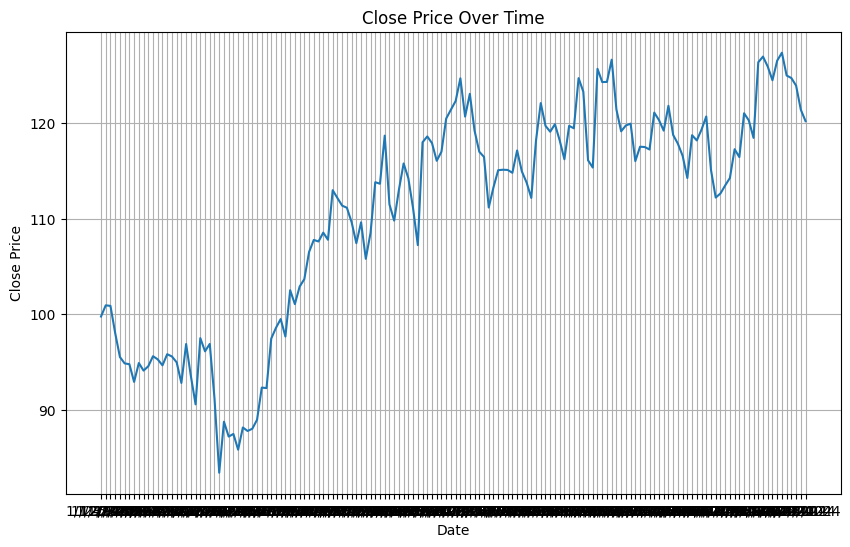

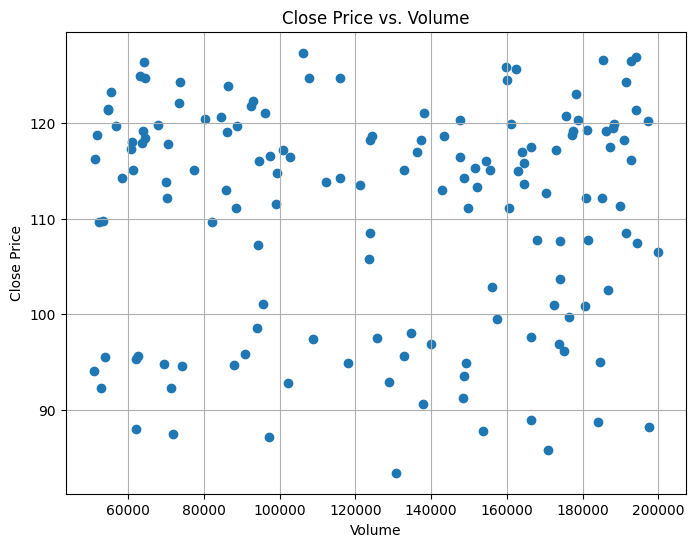

In [14]:
# Example: Plotting 'Close' price over time
plt.figure(figsize=(10, 6))
plt.plot(data['Date'], data['Close'])
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.grid(True)
plt.show()


# Example: Scatter plot of 'Close' vs. 'Volume'
plt.figure(figsize=(8, 6))
plt.scatter(data['Volume'], data['Close'])
plt.xlabel('Volume')
plt.ylabel('Close Price')
plt.title('Close Price vs. Volume')
plt.grid(True)
plt.show()



📊 Descriptive Statistics:
Mean Return:         0.0656
Standard Deviation:  0.0985
Skewness:            0.6140
Kurtosis:            -0.1420

📈 ADF Test (Stationarity):
ADF Statistic:       -5.1580
ADF p-value:         0.000011
✅ Conclusion: Log returns are stationary.


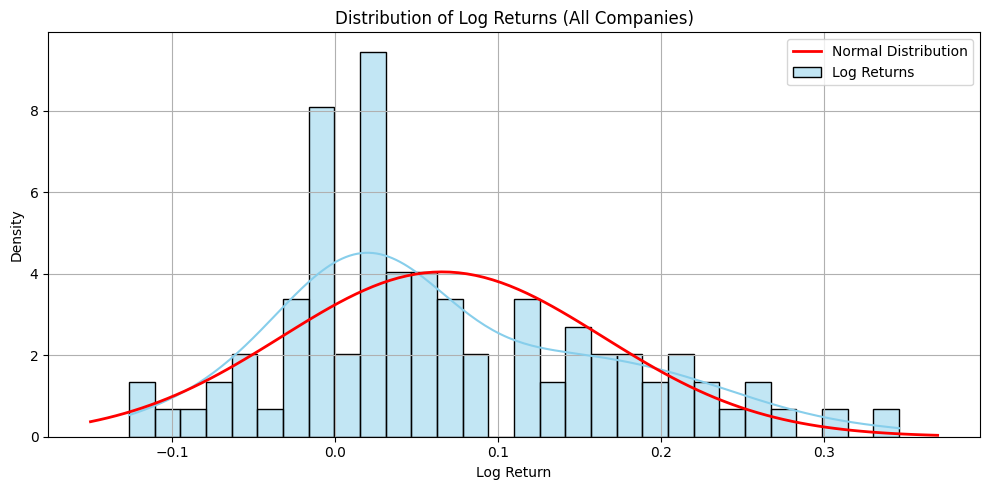

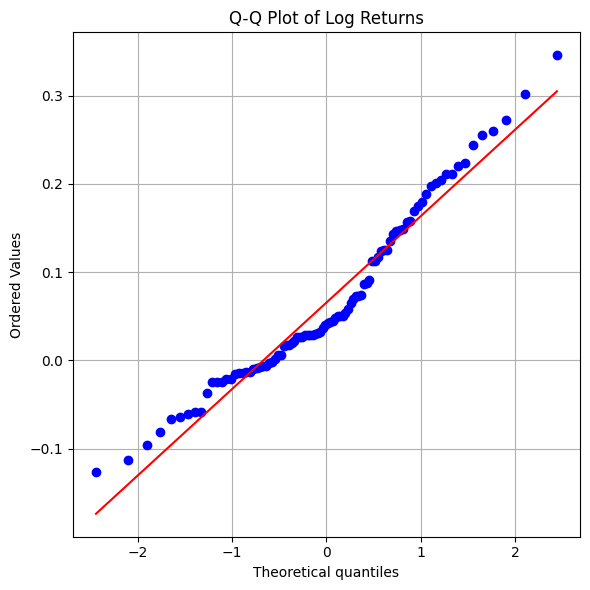

In [ ]:
from scipy.stats import skew, kurtosis, norm, probplot
from statsmodels.tsa.stattools import adfuller

# Load data
df = pd.read_csv("chronological_sample.csv")

# Convert Date and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values(by=['Company', 'Date'])

# Calculate log returns for all companies
log_returns_list = []
for company, group in df.groupby('Company'):
    group = group.sort_values('Date')
    group['Log_Returns'] = np.log(group['Close'] / group['Close'].shift(1))
    group.dropna(subset=['Log_Returns'], inplace=True)
    log_returns_list.append(group[['Date', 'Company', 'Log_Returns']])

# Combine all returns
all_returns = pd.concat(log_returns_list, ignore_index=True)

# Descriptive Statistics

mean_return = all_returns['Log_Returns'].mean()
std_return = all_returns['Log_Returns'].std()
skewness = skew(all_returns['Log_Returns'])
kurt = kurtosis(all_returns['Log_Returns'])

print("\n📊 Descriptive Statistics:")
print(f"Mean Return:         {mean_return:.4f}")
print(f"Standard Deviation:  {std_return:.4f}")
print(f"Skewness:            {skewness:.4f}")
print(f"Kurtosis:            {kurt:.4f}")

# ADF Test

adf_stat, adf_pvalue, _, _, _, _ = adfuller(all_returns['Log_Returns'])

print("\n📈 ADF Test (Stationarity):")
print(f"ADF Statistic:       {adf_stat:.4f}")
print(f"ADF p-value:         {adf_pvalue:.6f}")
if adf_pvalue < 0.05:
    print("✅ Conclusion: Log returns are stationary.")
else:
    print("❌ Conclusion: Log returns are not stationary.")

# Plot Distribution of Returns

plt.figure(figsize=(10, 5))
sns.histplot(all_returns['Log_Returns'], bins=30, kde=True, stat="density", color="skyblue", label="Log Returns")
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mean_return, std_return)
plt.plot(x, p, 'r', linewidth=2, label="Normal Distribution")
plt.title("Distribution of Log Returns (All Companies)")
plt.xlabel("Log Return")
plt.ylabel("Density")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Q-Q Plot

plt.figure(figsize=(6, 6))
probplot(all_returns['Log_Returns'], dist="norm", plot=plt)
plt.title("Q-Q Plot of Log Returns")
plt.grid(True)
plt.tight_layout()
plt.show()


                               SARIMAX Results                                
Dep. Variable:                  Close   No. Observations:                  150
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -370.451
Date:                Sun, 06 Apr 2025   AIC                            750.903
Time:                        19:03:33   BIC                            765.922
Sample:                             0   HQIC                           757.005
                                - 150                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2992      0.431     -0.694      0.487      -1.144       0.545
ar.L2          0.0779      0.376      0.207      0.836      -0.659       0.814
ma.L1          0.1370      0.401      0.341      0.7

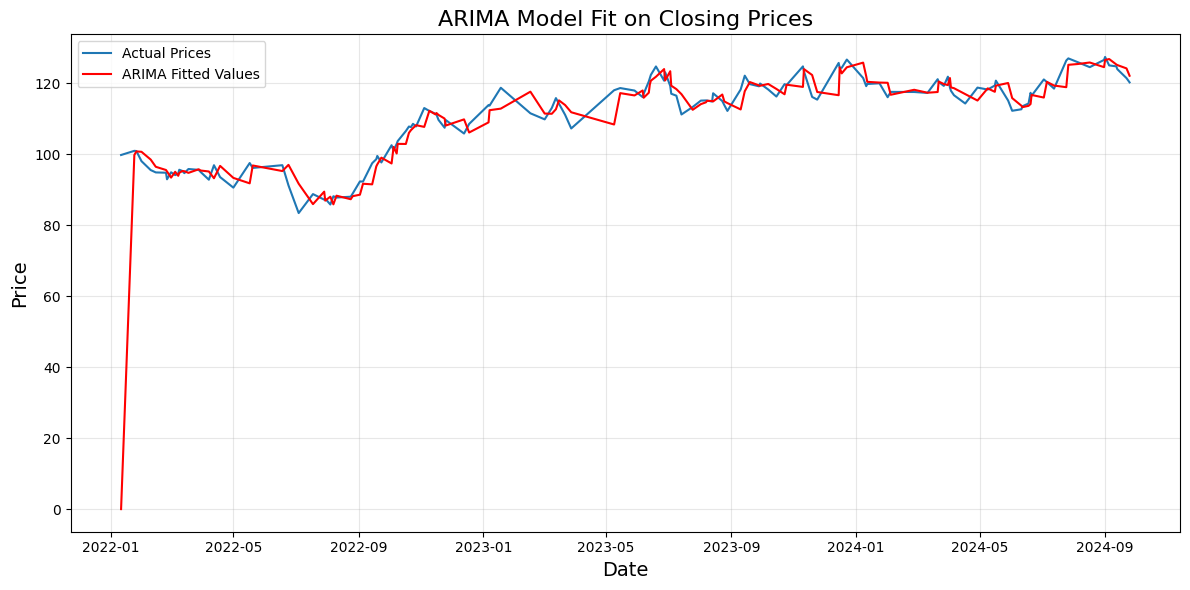

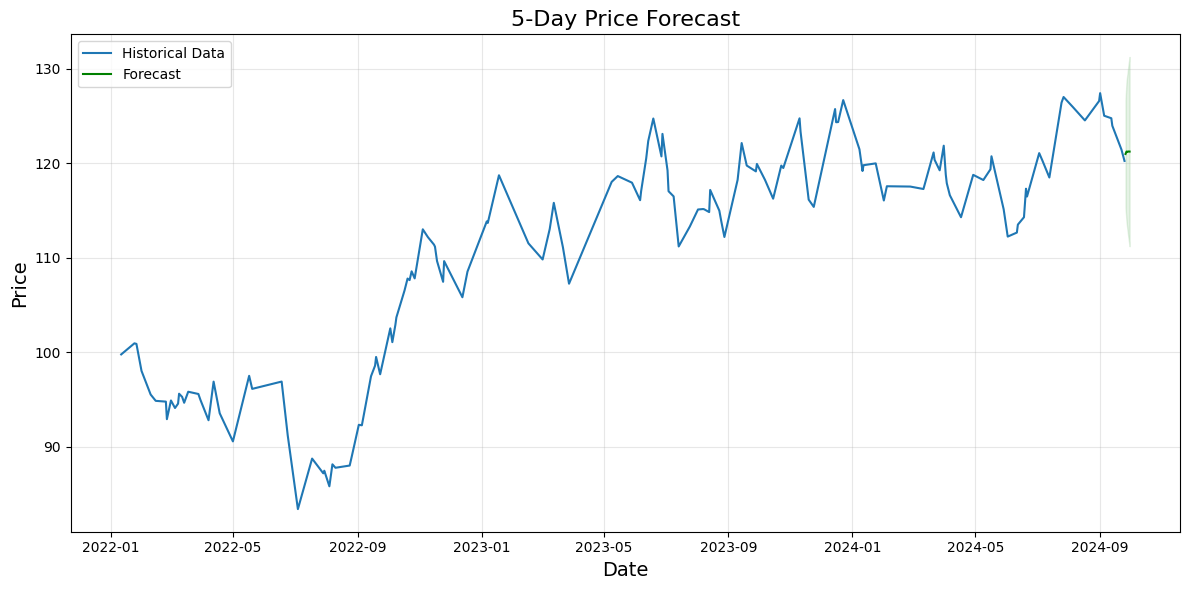


Company Encoding Mapping:
AMD: 0
Adobe: 1
Airbus: 2
Alibaba: 3
Amazon: 4
AstraZeneca: 5
BMW: 6
BP: 7
Bank of America: 8
Boeing: 9
Chevron: 10
Citigroup: 11
ExxonMobil: 12
Ferrari: 13
Ford: 14
Gilead Sciences: 15
Goldman Sachs: 16
Google: 17
HSBC: 18
Honda: 19
IBM: 20
Intel: 21
JPMorgan Chase: 22
Johnson & Johnson: 23
LG: 24
Lamborghini: 25
Lockheed Martin: 26
Lyft: 27
Mercedes-Benz: 28
Meta: 29
Microsoft: 30
Moderna: 31
Morgan Stanley: 32
Netflix: 33
Novartis: 34
Nvidia: 35
Panasonic: 36
PayPal: 37
Pfizer: 38
Porsche: 39
Raytheon: 40
Roche: 41
Salesforce: 42
Samsung: 43
Shell: 44
Snapchat: 45
Sony: 46
Spotify: 47
Square: 48
Tencent: 49
Tesla: 50
TotalEnergies: 51
Toyota: 52
Twitter: 53
Uber: 54
Wells Fargo: 55

Sector Encoding Mapping:
Aerospace: 0
Automotive: 1
Consumer Goods: 2
Energy: 3
Finance: 4
Healthcare: 5
Technology: 6

Trend Encoding Mapping:
Bearish: 0
Bullish: 1
Stable: 2


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

data = pd.read_csv('chronological_sample.csv', parse_dates=['Date'])
data.sort_values('Date', inplace=True)  # Ensure chronological order

# 1. Convert categorical features to numeric
# Company encoding
company_encoder = LabelEncoder()
data['Company_Code'] = company_encoder.fit_transform(data['Company'])

# Sector encoding
sector_encoder = LabelEncoder()
data['Sector_Code'] = sector_encoder.fit_transform(data['Sector'])

# Trend encoding
trend_encoder = LabelEncoder()
data['Trend_Code'] = trend_encoder.fit_transform(data['Trend'])

# 2. Prepare time series data
# Let's focus on closing price for ARIMA modeling
ts_data = data.set_index('Date')['Close']

# 3. ARIMA Model Implementation
def fit_arima_model(series, order=(1,1,1)):
    model = ARIMA(series, order=order)
    model_fit = model.fit()
    return model_fit

# Fit ARIMA model (parameters can be tuned)
arima_model = fit_arima_model(ts_data, order=(2,1,2))

# 4. Model Summary
print(arima_model.summary())

# 5. Visualize Results
plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Actual Prices')
plt.plot(arima_model.fittedvalues, color='red', label='ARIMA Fitted Values')
plt.title('ARIMA Model Fit on Closing Prices', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 6. Forecasting (example for next 5 periods)
forecast_steps = 5
forecast = arima_model.get_forecast(steps=forecast_steps)
forecast_index = pd.date_range(ts_data.index[-1], periods=forecast_steps+1, freq='D')[1:]

plt.figure(figsize=(12, 6))
plt.plot(ts_data, label='Historical Data')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='green')
plt.fill_between(forecast_index,
                 forecast.conf_int()['lower Close'],
                 forecast.conf_int()['upper Close'],
                 color='green', alpha=0.1)
plt.title(f'{forecast_steps}-Day Price Forecast', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Price', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 7. Save encoded data and model results
encoded_data = data[['Date', 'Company_Code', 'Sector_Code', 'Trend_Code',
                     'Open', 'High', 'Low', 'Close', 'Volume']]
encoded_data.to_csv('encoded_stock_data.csv', index=False)

# Print mapping for reference
print("\nCompany Encoding Mapping:")
for i, company in enumerate(company_encoder.classes_):
    print(f"{company}: {i}")

print("\nSector Encoding Mapping:")
for i, sector in enumerate(sector_encoder.classes_):
    print(f"{sector}: {i}")

print("\nTrend Encoding Mapping:")
for i, trend in enumerate(trend_encoder.classes_):
    print(f"{trend}: {i}")

Classification Report:
               precision    recall  f1-score   support

     Bearish       0.00      0.00      0.00         4
     Bullish       0.37      0.58      0.45        12
      Stable       0.50      0.07      0.12        14

    accuracy                           0.27        30
   macro avg       0.29      0.22      0.19        30
weighted avg       0.38      0.27      0.24        30



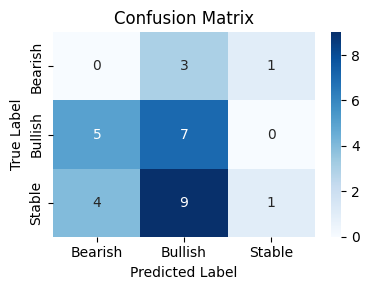

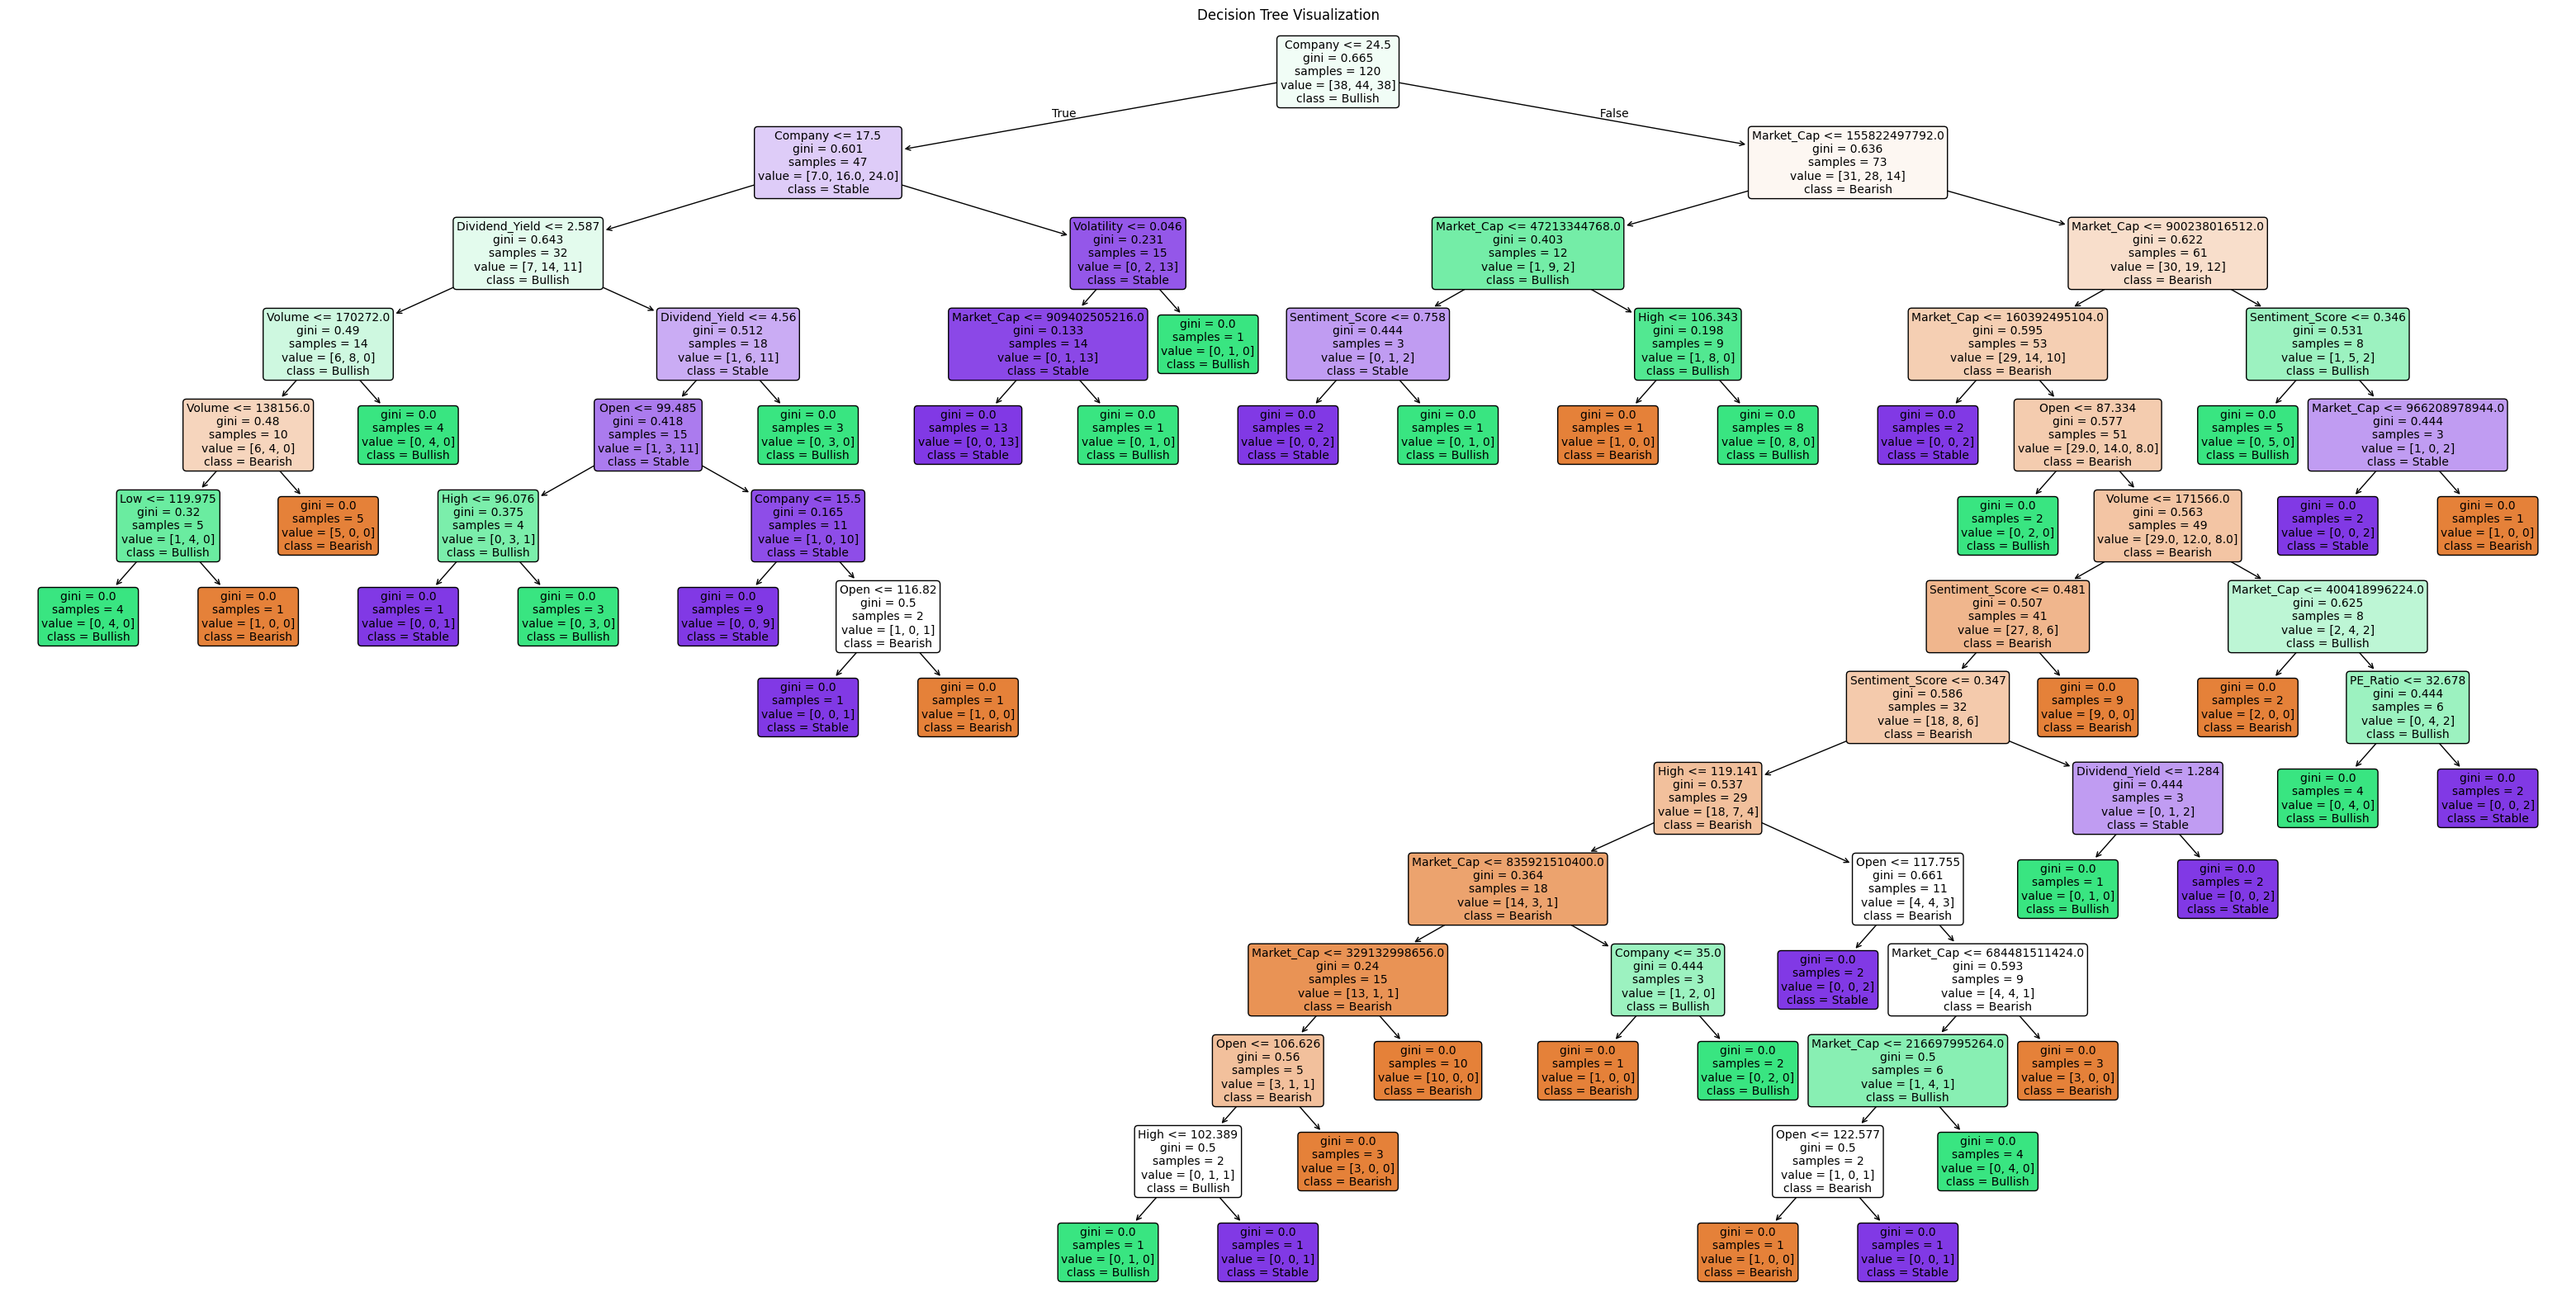

In [21]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix

# Load dataset
df = pd.read_csv("chronological_sample.csv")  # Update the path if needed

# Encode categorical columns
df_encoded = df.copy()
label_encoders = {}

# Encode 'Sector' and 'Company'
for col in ['Sector', 'Company']:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# Encode target 'Trend'
le_trend = LabelEncoder()
df_encoded['Trend'] = le_trend.fit_transform(df_encoded['Trend'])

# Define features and target
X = df_encoded.drop(columns=['S.No', 'Date', 'Trend'])
y = df_encoded['Trend']

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree
clf = DecisionTreeClassifier(random_state=42)
clf.fit(X_train, y_train)

# Predictions and Evaluation
y_pred = clf.predict(X_test)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred, target_names=le_trend.classes_)

# Print classification report
print("Classification Report:\n", class_report)

# Plot confusion matrix
plt.figure(figsize=(4, 3))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=le_trend.classes_,
            yticklabels=le_trend.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

# Plot decision tree
plt.figure(figsize=(40, 20))
plot_tree(clf, feature_names=X.columns, class_names=le_trend.classes_,
          filled=True, rounded=True, fontsize=10)
plt.title("Decision Tree Visualization")
plt.show()


In [23]:
data = pd.read_csv('chronological_sample.csv')

# Select the specified columns
selected_columns = ['Open', 'High', 'Low', 'Close', 'Volume']
numeric_data = data[selected_columns]

# Calculate correlation matrix
corr_matrix = numeric_data.corr()

# Print the correlation matrix
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
            Open      High       Low     Close    Volume
Open    1.000000  0.998453  0.998500  1.000000 -0.010370
High    0.998453  1.000000  0.997093  0.998453 -0.012928
Low     0.998500  0.997093  1.000000  0.998500 -0.009195
Close   1.000000  0.998453  0.998500  1.000000 -0.010370
Volume -0.010370 -0.012928 -0.009195 -0.010370  1.000000
